# Business Analysis on Movie Production
> ## TMDB EDA (Exploratory Data Analysis)

## Business Problem.

The Data gotten from the previously combined TMDB files in phase two would be analysed and the answer to the following questions found through exploratory data analysis.( Exclude any movies with null values and 0's for budget AND revenue from the remaining visualizations.)

>- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

>- How many movies are there in each of the certification categories (G/PG/PG-13/R)?

>- What is the average revenue per certification category?

>- What is the average budget per certification category?

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
price_format = StrMethodFormatter("${x:,.0f}")
sns.set_style('white')

## Data

**loading the dataset from the year 2000 to 2020**

In [2]:
import glob

# Get CSV files list from the saved folder
path = "/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years"
csv_files = glob.glob(path + "/*.csv.gz")
csv_files

['/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2000.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2001.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2002.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2003.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2004.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2005.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2006.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2007.csv.gz',
 '/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files/tmdb_years\\final_tmdb_data_2008.c

In [3]:
# Read each CSV file into DataFrame
# This creates a list of dataframes
years_df = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
tmdb_2000_2020   = pd.concat(years_df, ignore_index=True)

# Remove the initial row which has null data
tmdb_2000_2020= tmdb_2000_2020.loc[1:,:]

In [4]:
tmdb_2000_2020

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1860.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,45.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59708,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
59709,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
59710,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
59711,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


In [5]:
tmdb_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59712 entries, 1 to 59712
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                59712 non-null  object 
 1   adult                  59691 non-null  float64
 2   backdrop_path          36755 non-null  object 
 3   belongs_to_collection  3705 non-null   object 
 4   budget                 59691 non-null  float64
 5   genres                 59691 non-null  object 
 6   homepage               14734 non-null  object 
 7   id                     59691 non-null  float64
 8   original_language      59691 non-null  object 
 9   original_title         59691 non-null  object 
 10  overview               58318 non-null  object 
 11  popularity             59691 non-null  float64
 12  poster_path            53985 non-null  object 
 13  production_companies   59691 non-null  object 
 14  production_countries   59691 non-null  object 
 15  re

**Excluding any movies with null values for budget AND revenue**

In [6]:
#Checking for null values in budget and revenue
tmdb_2000_2020[["budget", "revenue"]].isnull().sum()

budget     21
revenue    21
dtype: int64

In [7]:
#Dropping of null values in budget and revenue
tmdb_2000_2020 = tmdb_2000_2020.dropna(subset=["budget", "revenue"])

In [8]:
#Confirming changes
tmdb_2000_2020[["budget", "revenue"]].isnull().sum()

budget     0
revenue    0
dtype: int64

>- ### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [29]:
#Grouping the dataframe based on budget and revenue with values greater than 0
new_df = tmdb_2000_2020[(tmdb_2000_2020["budget"]>0) & (tmdb_2000_2020["revenue"]>0) ]
new_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1860.0,PG
11,tt0120467,0.0,NaN,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.5,40.0,R
13,tt0120630,0.0,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.7,3992.0,G
16,tt0120753,0.0,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.9,247.0,R
17,tt0120755,0.0,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.1,5266.0,PG-13


In [10]:
#Checking the number of rows of the data
new_df.shape

(5078, 26)

**There are 5078 movies with information on budget or revenue**

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078 entries, 4 to 59691
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                5078 non-null   object 
 1   adult                  5078 non-null   float64
 2   backdrop_path          4856 non-null   object 
 3   belongs_to_collection  1117 non-null   object 
 4   budget                 5078 non-null   float64
 5   genres                 5078 non-null   object 
 6   homepage               2416 non-null   object 
 7   id                     5078 non-null   float64
 8   original_language      5078 non-null   object 
 9   original_title         5078 non-null   object 
 10  overview               5070 non-null   object 
 11  popularity             5078 non-null   float64
 12  poster_path            5040 non-null   object 
 13  production_companies   5078 non-null   object 
 14  production_countries   5078 non-null   object 
 15  rel

>- ### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [12]:
#Number of movies per certification
new_df["certification"].value_counts()

R        1704
PG-13    1446
PG        523
NR        145
G          89
NC-17      15
R           1
Name: certification, dtype: int64

In [13]:
new_df["certification"]= new_df["certification"].str.strip()

C:\Users\heill\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
new_df["certification"].value_counts()

R        1705
PG-13    1446
PG        523
NR        145
G          89
NC-17      15
Name: certification, dtype: int64

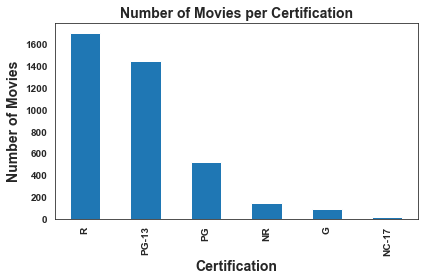

In [15]:
#Barchart representation of the number of movies per certification
new_df["certification"].value_counts().plot.bar()
plt.title('Number of Movies per Certification', fontsize = 14, weight='bold')
plt.xlabel('Certification', fontsize = 14, weight='bold')
plt.ylabel('Number of Movies', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

In [16]:
#Total number of movies with certification under the new filtered dataframe
new_df["certification"].value_counts().sum()

3923

In [17]:
#Number of movies with null values in certification column
new_df["certification"].isnull().sum()

1155

**R certification has 138 movies, PG-13 has 116, PG has 29 movies, G has a total of 13 and NR has only 16 movies. The dataframe also has 36 "certification" columns with null values , which sums up to the total number of enteries for the filtered dataframe(338).**

>- ### What is the average revenue per certification category?

In [18]:
#Grouping the dataframe based on certification and extracting the average revenue per certification

filt_rev = new_df.groupby('certification')\
            ['revenue'].agg(['mean']).sort_values('mean', ascending=False)
filt_rev['mean'] = round(filt_rev['mean']) #.apply('{:,}'.format)

filtered = round(filt_rev['mean']).apply('{:,}'.format)
filtered

certification
PG       183,332,851.0
G        165,248,971.0
PG-13    159,859,257.0
R         56,983,147.0
NR        31,643,778.0
NC-17     10,485,581.0
Name: mean, dtype: object

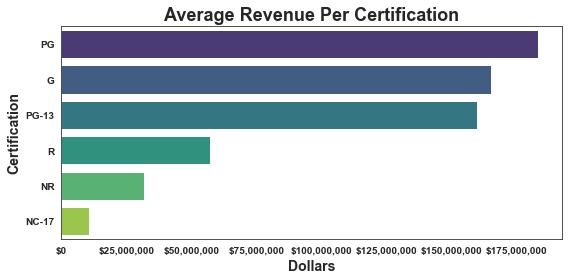

In [19]:

#Barchart representation of the average revenue per certification
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=filt_rev, x='mean', y=filt_rev.index, 
            orient='h', palette='viridis'); 
plt.title('Average Revenue Per Certification', fontsize = 18, weight='bold')
plt.xlabel('Dollars', fontsize = 14, weight='bold')
plt.ylabel('Certification', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
ax.xaxis.set_major_formatter(price_format)

plt.tight_layout()
plt.show;

>- ### What is the average budget per certification category?

In [20]:
#Grouping the dataframe based on certification and extracting the average budget per certification
filt_budget = new_df.groupby('certification')\
            ['budget'].agg(['mean']).sort_values('mean', ascending=False)
filt_budget['mean'] = round(filt_budget['mean'])
filtered = round(filt_budget['mean']) .apply('{:,}'.format) 
filtered

certification
PG       59,679,782.0
PG-13    53,659,892.0
G        51,814,466.0
R        23,978,639.0
NR       11,379,389.0
NC-17     5,027,537.0
Name: mean, dtype: object

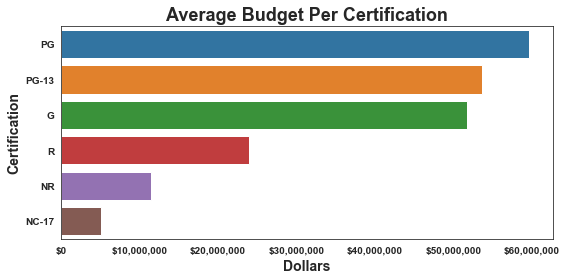

In [21]:
#Barchart representation of the average budget per certification
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=filt_budget, x='mean', y=filt_budget.index, 
            orient='h'); 
plt.title('Average Budget Per Certification', fontsize = 18, weight='bold')
plt.xlabel('Dollars', fontsize = 14, weight='bold')
plt.ylabel('Certification', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
ax.xaxis.set_major_formatter(price_format)

plt.tight_layout()
plt.show;

**Saving the combined dataframe into an existing folder(FOLDER)**

In [22]:
#Checking the contents of the folder
FOLDER = "C:/Users/heill/OneDrive/Documents/Github/Database_Movies/Movies_files"
import os
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'Title_Akas.csv',
 'Title_Akas.csv.gz',
 'Title_Basics.csv',
 'Title_Basics.csv.gz',
 'Title_Ratings.csv',
 'Title_Ratings.csv.gz',
 'tmdb_combined_years.csv.gz',
 'tmdb_years']

In [23]:
#saving the dataframe
new_df.to_csv(f"{FOLDER}/tmdb_combined_years.csv.gz",  index =False)

In [24]:
#Confirmig the success of the saving process
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'Title_Akas.csv',
 'Title_Akas.csv.gz',
 'Title_Basics.csv',
 'Title_Basics.csv.gz',
 'Title_Ratings.csv',
 'Title_Ratings.csv.gz',
 'tmdb_combined_years.csv.gz',
 'tmdb_years']